In [1]:
# ===================================================================
#                          METADATA
# ===================================================================

# -------------------- General Information --------------------------
# 1. Title: Figure Script
# 2. Description: Script to reproduce Figure SI 2 in the article
# "Ionic Liquid--Electrode Interface: from One Law To Fit Them All to One Model To Predict Them All".
# 3. Authors:
#    - Ba Long Nguyen (ORCID: 0009-0003-7682-9851)
#    - Vladislav Ivanistsev (ORCID: 0000-0003-4517-0540)
# 4. Contact: balongn99@gmail.com & vladislav.ivanistsev@gmail.com
# 5. Keywords: differential capacitance, ionic liquids, modelling, fitting.

# -------------------- Identifiers & Versioning ---------------------
# 6. Version: 1.0.0
# 7. Date: 
#    - Created: 2025-06-13
#    - Last Modified: 2025-09-24
# 8. DOI: https://doi.org/10.1016/j.elecom.2025.108049

# -------------------- Usage & Accessibility ------------------------
# 10. License: This work is licensed under the MIT License.
# 11. Dependencies:
#     - Python 3.8+
#     - See 'requirements.txt' for necessary libraries (e.g., numpy, pandas, scipy, matplotlib).
# 13. Data Format:
#     - Units: Potential (V), Capacitance (μF/cm²), Surface Charge Density (μC/cm²)

In [2]:
from cycler import cycler
from scipy.integrate import quad
import numdifftools as nd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math

In [3]:
l = 17/2.54 # inches
plt.rc('figure',figsize=(l,l*0.8)) # figure size
plt.rc('figure',      dpi=500) # figure dpi
plt.rc('lines',  linewidth=1)  # linewidth
plt.rc('font',        size=10) # fontsize of the text
plt.rc('font', family='sans-serif') # font family
plt.rc('axes',   titlesize=10) # fontsize of the axes title
plt.rc('axes',   labelsize=9)  # fontsize of the x and y labels
plt.rc('xtick',  labelsize=8)  # fontsize of the tick labels
plt.rc('ytick',  labelsize=8)  # fontsize of the tick labels
plt.rc('legend', fontsize =8)  # fontsize of the legend
plt.rc('figure', titlesize=10) # fontsize of the figure title

In [7]:
# ──────────────────── POWER-LAW MODEL ────────────────────
EXCLUDE = np.nan
def a(u, u_M, s_M, k1, k2):
    expo = k1 + (1 - k1) * np.exp(-k2 * u / u_M)
    if s_M > 0:                         # only right half-plane allowed
        expo = np.where(u >= 0, expo, EXCLUDE)
    else:                               # only left half-plane allowed
        expo = np.where(u <= 0, expo, EXCLUDE)
    return expo
      
def s(u, u_M, s_M, k1, k2): 
  return s_M * abs(u / u_M)**a(u, u_M, s_M, k1, k2)

def s_wrapper(x, *args, **kwargs):
    return s(x, *args)

def C(u, u_M, s_M, k1, k2):
  derivative = nd.Derivative(s_wrapper, step=1e-12)
  return derivative(u, u_M, s_M, k1, k2)

In [5]:
# ──────────────────── DATASETS ────────────────────
data_TFSAN1114 = {
  "U": np.array([
    -8.9566823, -8.2478534, -7.5539807, -6.893926, -6.2196714, -5.5059203,
    -4.8100116, -4.1775398, -3.4441147, -2.8285412, -2.2661154, -1.718025,
    -1.2206901, -0.86129428, -0.44734986, -0.12596974, 0.20473219, 0.56724145,
    0.94385464, 1.3417375, 1.6843227, 2.1589204, 2.6623967, 3.1896993,
    3.6999483, 4.3729092, 5.1801261, 5.9271759, 6.9324836, 7.8293742, 8.720207
]),
  "C": np.array([
    4.0440597, 4.2699344, 4.4371021, 4.4434628, 4.4061309, 4.4277104, 4.403857,
    4.5079396, 4.7067409, 4.9690282, 5.4515596, 6.0836948, 6.7411088, 7.6555108,
    8.4480979, 8.6335089, 8.7168063, 8.2449322, 8.1143354, 7.7211142, 7.1213932,
    6.4818836, 5.9850114, 5.5431609, 4.8718318, 4.3559651, 3.7779067, 3.4962842,
    3.3728672, 3.2710784, 3.2918675
]),
  "dC": np.array([
    0.048239195, 0.021492575, 0.01773176, 0.034016327, 0.020275244,
    0.047142588, 0.064669462, 0.073382852, 0.097048716, 0.059920953,
    0.019793531, 0.10805177, 0.15825102, 0.18622275, 0.17393211,
    0.22257698, 0.028241537, 0.022404077, 0.11721826, 0.20736835,
    0.16374179, 0.11214443, 0.040034989, 0.1161786, 0.094479814,
    0.10253857, 0.076653153, 0.075149379, 0.084504154, 0.04054821,
    0.031657104
])
}
data_TFSAN1144 = {
  "U": np.array([
    -8.8654072, -7.9306557, -7.0050661, -6.1780256, -5.4940108, -4.666761,
    -3.8733266, -3.1571084, -2.3580143, -1.7975436, -1.2521956, -0.81373714,
    -0.4094232, -0.057718006, 0.28247906, 0.6662099, 1.0233817, 1.3942538,
    1.7239589, 2.2702502, 2.7017659, 3.1950107, 3.737417, 4.3554723,
    5.0972423, 6.0656409, 6.8587863
]),
  "C": np.array([
    3.0441661, 3.2481886, 3.5657465, 3.7689075, 3.8969208, 3.9540713, 3.8935489,
    4.1769831, 4.5893008, 5.2306263, 6.2075039, 7.009428, 7.9203937, 8.2969356,
    8.4406954, 8.3125825, 8.3906745, 7.7516559, 7.1579263, 6.616438, 6.1187754,
    5.8196756, 5.0907541, 4.266671, 3.8089723, 3.454309, 3.3070536
]),
  "dC": np.array([
    0.0455846, 0.01767655, 0.039734544, 0.090192538, 0.073133347, 0.082483908,
    0.049458109, 0.099132595, 0.11216115, 0.11354059, 0.05854256, 0.073762804,
    0.046726256, 0.1544541, 0.082359485, 0.082520473, 0.063849271, 0.3294166,
    0.28049373, 0.25208701, 0.15630168, 0.016031754, 0.045311861, 0.064660344,
    0.11975131, 0.082470792, 0.20614735
])
}
data_TFSAN1444 = {
  "U": np.array([
    -8.3471953, -7.3284585, -6.3323917, -5.3935963, -4.4607511, -3.6253825,
    -2.8072444, -1.9518697, -1.492276, -1.2818577, -0.9988757, -0.7828346,
    -0.56227069, -0.34848205, -0.17995929, -0.019204594, 0.095999847,
    0.34901804, 0.49749229, 0.711711, 0.86740834, 1.0766674, 1.1570238,
    1.3724832, 1.8167261, 2.247584, 2.7208152, 3.2875645, 3.762309,
    4.5039261, 5.148517
]),
  "C": np.array([
    2.835326, 2.9506751, 3.102149, 3.2514403, 3.4598331, 3.5954313, 3.5663506,
    3.9684596, 4.5572039, 5.3499249, 6.4213386, 6.5765571, 7.3102311, 7.9327507,
    9.2040244, 9.0655433, 8.79109, 8.1296419, 7.9496588, 8.2993821, 8.9952376,
    9.4020184, 8.7264091, 8.2272501, 6.8495962, 6.492727, 6.1845399, 5.4065466,
    4.9598812, 4.3912146, 3.9403927
]),
  "dC": np.array([
    0.027831316, 0.02029681, 0.027033727, 0.022701913, 0.031191883,
    0.023856931, 0.02526229, 0.28119206, 0.24014217, 0.3369417,
    0.20175832, 0.13690707, 0.12681763, 0.084417118, 0.11252085,
    0.64400311, 0.61826413, 0.5300547, 0.35538246, 0.28988308,
    0.49747286, 0.77335413, 0.70254107, 0.69207398, 0.055009441,
    0.072124614, 0.068609406, 0.1464859, 0.13430493, 0.11148882,
    0.24150723
])
}
data_TFSAN4444 = {
  "U": np.array([
    -6.9235032, -6.2943019, -5.6690349, -5.205766, -4.7180861, -4.2263572,
    -3.6921715, -3.2306907, -2.2112135, -1.8513477, -1.3382141, -0.91914043,
    -0.59790339, -0.48655425, -0.31282697, -0.13775049, 0.010520416,
    0.16427647, 0.34679497, 0.4941258, 0.68505385, 0.85330632, 0.93937834,
    1.1627972, 1.3694297, 1.7664467, 1.9672773, 2.304863, 2.5641512,
    2.8378304, 3.0135231, 3.3695203, 3.4283856
]),
  "C": np.array([
    2.6156619, 2.6266988, 2.7545252, 2.9779115, 3.0706948, 3.0442033,
    3.0222109, 3.0683997, 3.2665325, 3.3490758, 3.6424097, 4.3655909,
    6.0998612, 8.1976905, 9.6753046, 9.3218903, 9.3433827, 9.4674357,
    9.022579, 8.825957, 9.8087744, 9.5171614, 9.0262009, 8.4043191,
    7.3044666, 6.4439276, 5.8928442, 5.5292469, 5.7697162, 5.874368,
    6.7022525, 6.2945907, 5.7324958
]),
  "dC": np.array([
    0.064096479, 0.08174371, 0.047193305, 0.075968008, 0.01259677, 0.041627843,
    0.040374335, 0.089611885, 0.11804651, 0.12043831, 0.16563, 0.10928704,
    0.37561511, 0.77152823, 0.39347281, 0.09417825, 0.22686795, 0.21905967,
    0.21261624, 0.20448682, 0.56499967, 0.81030749, 0.59189395, 0.59527661,
    0.062871094, 0.33506675, 0.24606094, 0.24093311, 0.1242673, 0.35777088,
    0.73013686, 0.84170294, 2.0941119
])
}
# Create DataFrames
df_TFSAN1114 = pd.DataFrame(data_TFSAN1114)
df_TFSAN1144 = pd.DataFrame(data_TFSAN1144)
df_TFSAN1444 = pd.DataFrame(data_TFSAN1444)
df_TFSAN4444 = pd.DataFrame(data_TFSAN4444)
u_values = np.linspace(-10,10,1000)
# Parameters for the anions and cations
params = {
    "TFSA7": {
        "s_M": 41.4, "u_M": 7.7, "k1": 0.621348, "k2": 6.773745
    },
    "N1114": {
        "s_M": -62.9, "u_M":  -13.4, 'k1': 0.814593,    'k2': 49.834738
    },
    "TFSA10": {
        "s_M": 41.4, "u_M": 7.7, "k1": 0.598057, "k2": 5.366269
    },
    "N1144": {
        "s_M": -43.5, "u_M":  -9.6, "k1": 0.752002, "k2": 61.82
    },
    "TFSA13": {
        "s_M": 41.4, "u_M": 7.7, "k1": 0.625518, "k2": 5.883036
    },
    "N1444": {
        "s_M": -30.8, "u_M":  -7, 'k1': 0.686147,    'k2': 18.020777
    },
    "TFSA16": {
        "s_M": 41.4, "u_M": 7.7, "k1": 0.686512, "k2": 11.249078
    },
    "N4444": {
        "s_M": -22.5, "u_M":  -5.5, 'k1': 0.705415,    'k2': 33.948516
    }
}

/home/ba-long/miniconda-fresh/envs/jlab/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1617: RuntimeWarning: All-NaN slice encountered
  return fnb._ureduce(a,
/home/ba-long/miniconda-fresh/envs/jlab/lib/python3.12/site-packages/numdifftools/limits.py:150: UserWarning: All-NaN slice encountered
  warnings.warn(str(msg))


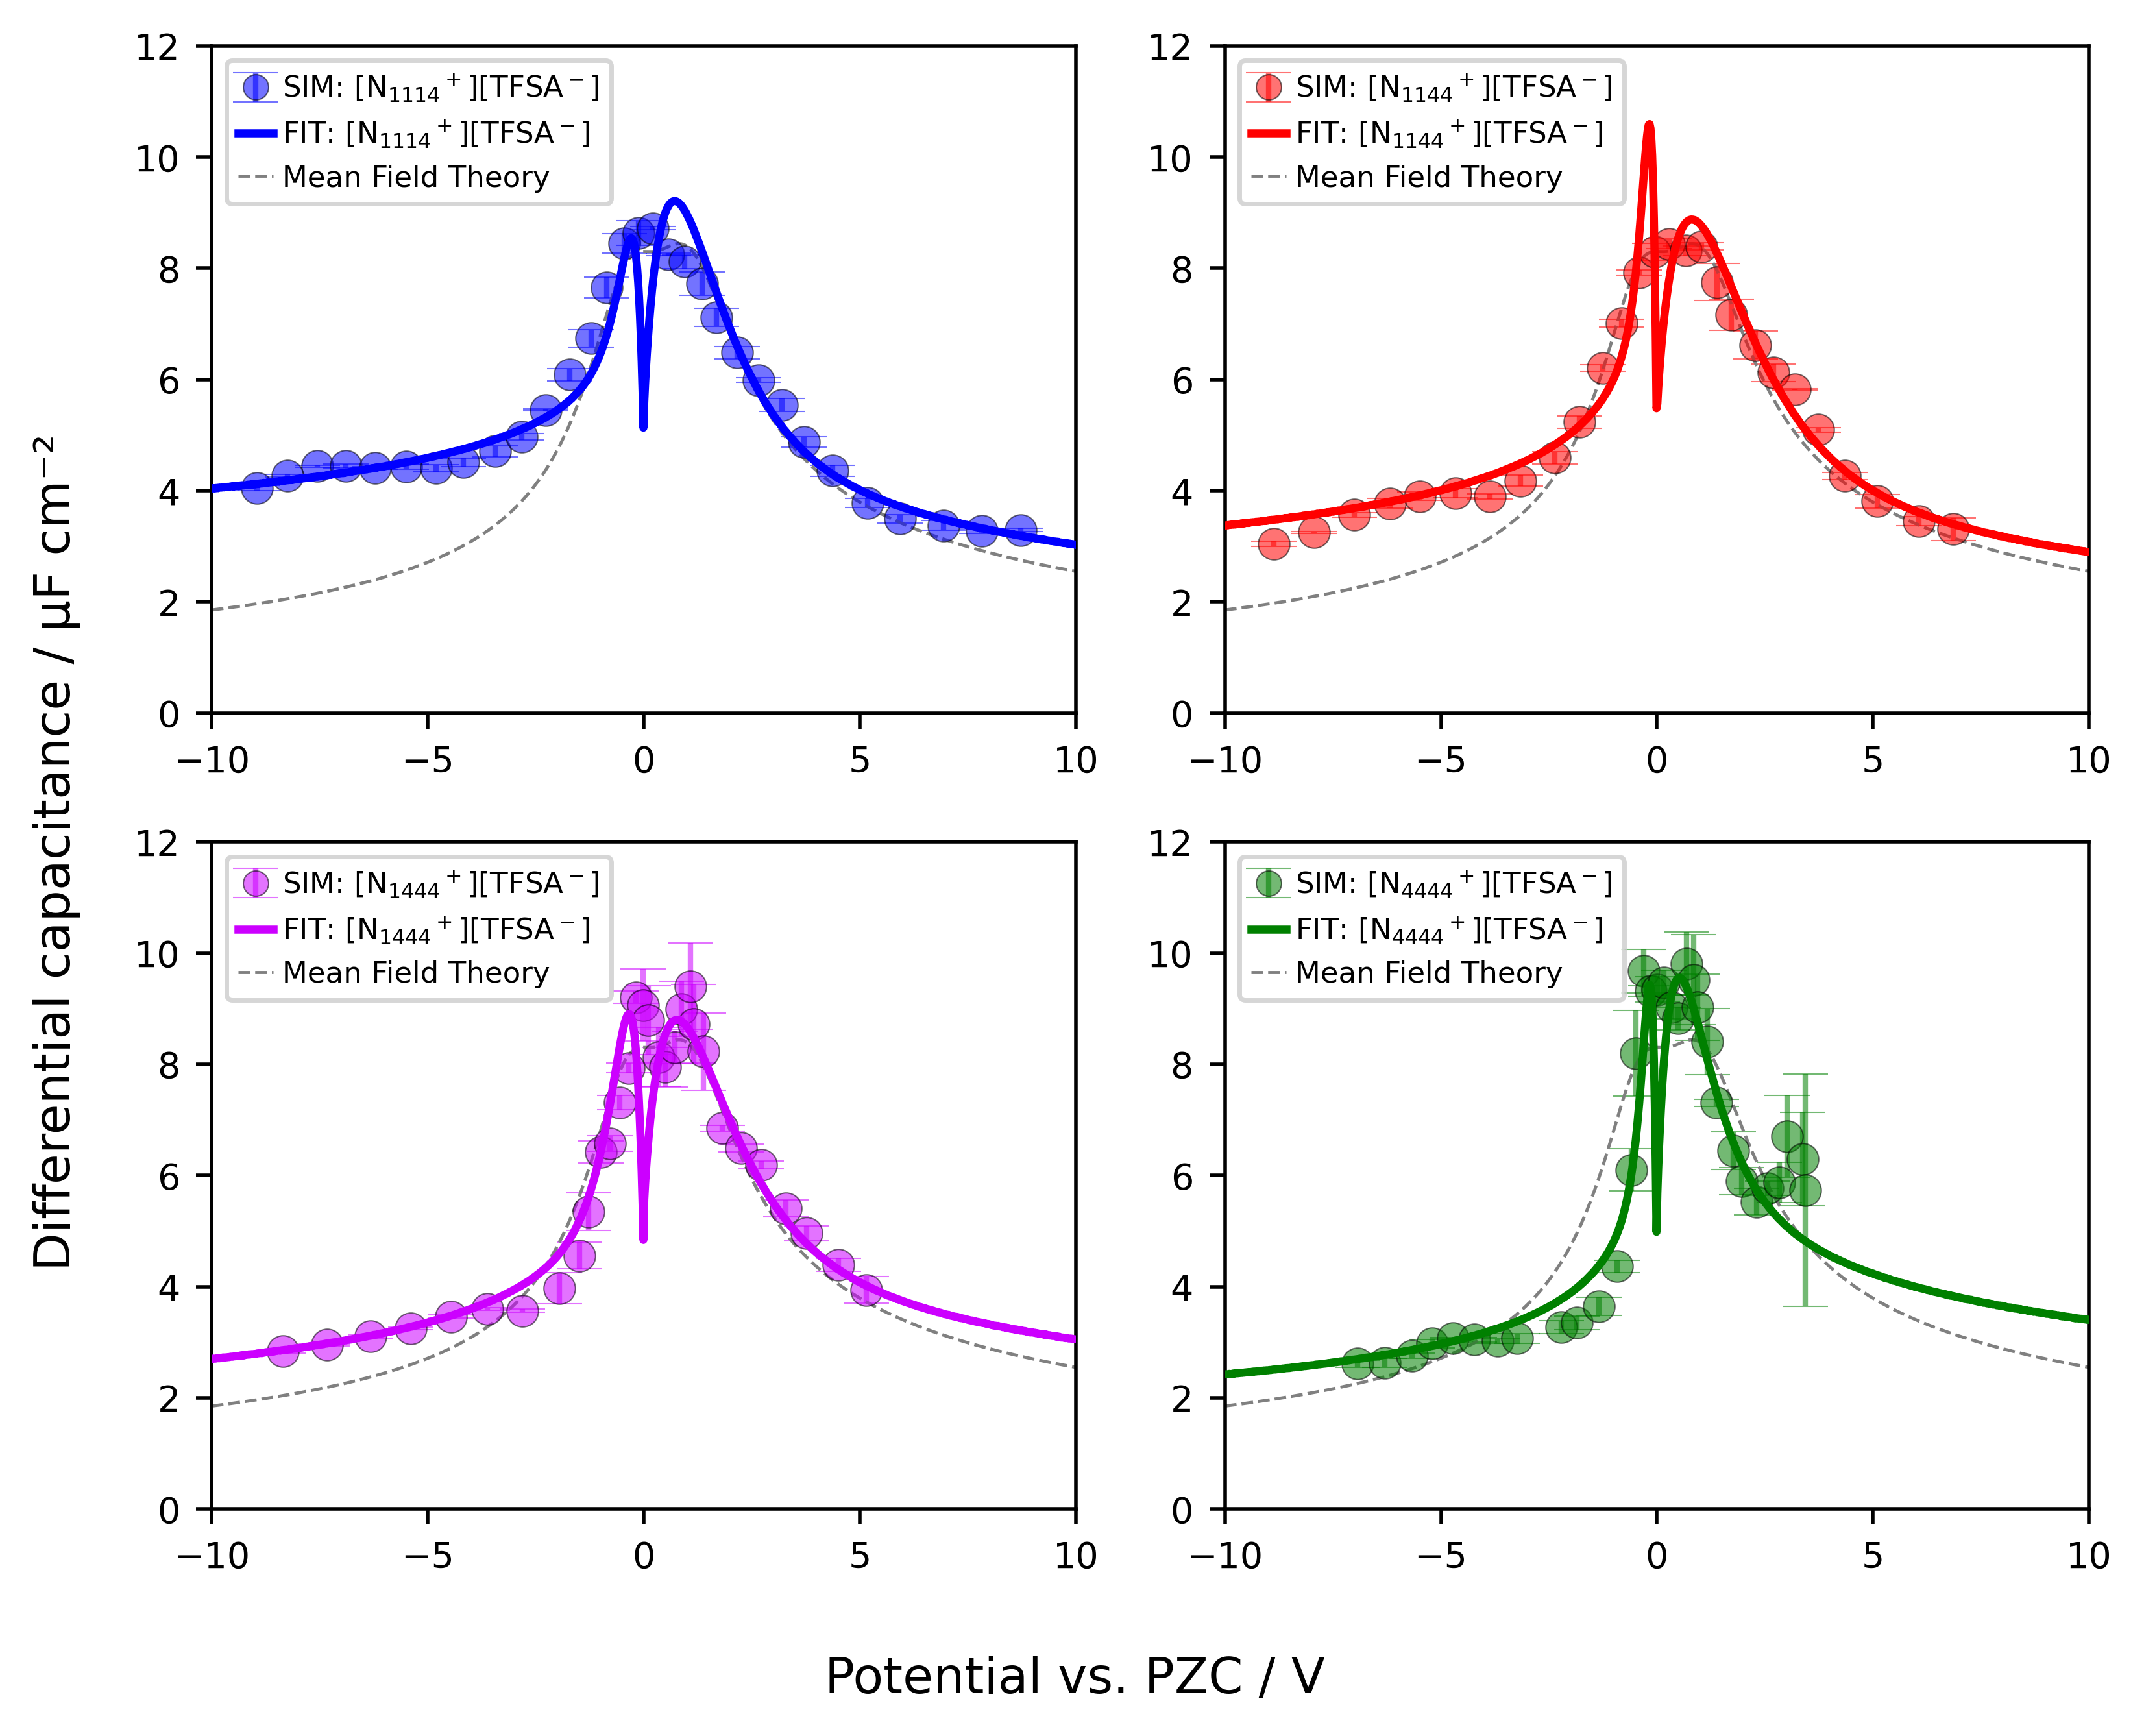

In [6]:
C_values = {}

for ion, param in params.items():
    C_values[ion] = [C(u, param['u_M'], param['s_M'], param['k1'], param['k2']) for u in u_values]
  
joint_Cdata = {}

joint_Cdata["FIT: $[\\mathrm{N_{1114}}^+][\\mathrm{TFSA}^-]$"] = np.concatenate((np.asarray(C_values['N1114'])[~np.isnan(np.asarray(C_values['N1114']))],
                                            np.asarray(C_values['TFSA7'])[~np.isnan(np.asarray(C_values['TFSA7']))]
                                           ))
joint_Cdata["FIT: $[\\mathrm{N_{1144}}^+][\\mathrm{TFSA}^-]$"] = np.concatenate((np.asarray(C_values['N1144'])[~np.isnan(np.asarray(C_values['N1144']))],
                                            np.asarray(C_values['TFSA10'])[~np.isnan(np.asarray(C_values['TFSA10']))]
                                           ))
joint_Cdata["FIT: $[\\mathrm{N_{1444}}^+][\\mathrm{TFSA}^-]$"] = np.concatenate((np.asarray(C_values['N1444'])[~np.isnan(np.asarray(C_values['N1444']))],
                                            np.asarray(C_values['TFSA13'])[~np.isnan(np.asarray(C_values['TFSA13']))]
                                           ))
joint_Cdata["FIT: $[\\mathrm{N_{4444}}^+][\\mathrm{TFSA}^-]$"] = np.concatenate((np.asarray(C_values['N4444'])[~np.isnan(np.asarray(C_values['N4444']))],
                                            np.asarray(C_values['TFSA16'])[~np.isnan(np.asarray(C_values['TFSA16']))]
                                           ))

Kornyshev = {
    "TN1114": {
        "Cd0": 8.6, "yp": 0.6, "ym": 0.4, "alpha": 0.05
    },
    "TN1144": {
        "Cd0": 8.3, "yp": 0.46 , "ym": 0.25, "alpha": 0.085
    },
    "TN1444": {
        "Cd0": 8.7, "yp": 0.7, "ym": 0.23, "alpha": 0.08
    },
    "TN4444": {
        "Cd0": 9.6, "yp": 0.8, "ym": 0.25, "alpha": 0.1
    }
}

Cd0 = Kornyshev["TN1144"]["Cd0"]              # Capacitance at PZC [µF/cm²]
gamma_plus = Kornyshev["TN1144"]["yp"]        # γ₊ from Table 2
gamma_minus = Kornyshev["TN1144"]["ym"]       # γ₋ from Table 2
alpha = Kornyshev["TN1144"]["alpha"]          # α in γ(u_reduced)

T = 423                  # Temperature in Kelvin
phi_range = (-10, 10)      # Potential range [V]
num_points = 1000        # Number of evaluation points

# ----------------------------------------------------------------------
# 🌡️ PHYSICAL CONSTANTS
# ----------------------------------------------------------------------
k_B = 1.380649e-23       # Boltzmann constant [J/K]
e = 1.602176634e-19      # Elementary charge [C]
Cd0_SI = Cd0 * 0.01      # Convert µF/cm² → F/m²

# ----------------------------------------------------------------------
# 📐 CALCULATE C_d USING MODIFIED KORNYSHEV FORMULA
# ----------------------------------------------------------------------
phi = np.linspace(*phi_range, num_points)
u_reduced = e * phi / (k_B * T)  # Dimensionless reduced potential

# γ(u_reduced) from Eq. 4
gamma_u = gamma_minus + (-gamma_minus + gamma_plus) / (1 + np.exp(alpha * u_reduced))

# Model formula
sinh_arg = alpha * u_reduced / 2
sinh_sq = np.sinh(sinh_arg)**2
cosh_val = np.cosh(sinh_arg)
denominator = 1 + 2 * gamma_u * sinh_sq
log_term = np.log(1 + 2 * gamma_u * sinh_sq)
sqrt_term = np.sqrt((2 * gamma_u * sinh_sq) / log_term)

# Final C_d(u)
Cd_u_SI = Cd0_SI * cosh_val / denominator * sqrt_term
Cd_u = Cd_u_SI / 0.01  # Back to µF/cm²

# Define list of compound keys
compounds = ["$[\\mathrm{N_{1114}}^+][\\mathrm{TFSA}^-]$", "$[\\mathrm{N_{1144}}^+][\\mathrm{TFSA}^-]$", "$[\\mathrm{N_{1444}}^+][\\mathrm{TFSA}^-]$", "$[\\mathrm{N_{4444}}^+][\\mathrm{TFSA}^-]$"]
colors = {"$[\\mathrm{N_{1114}}^+][\\mathrm{TFSA}^-]$": "blue", "$[\\mathrm{N_{1144}}^+][\\mathrm{TFSA}^-]$": "red", "$[\\mathrm{N_{1444}}^+][\\mathrm{TFSA}^-]$": "#cc00ffff", "$[\\mathrm{N_{4444}}^+][\\mathrm{TFSA}^-]$": "green"}

# Map compound to DataFrame
dfs = {
    "$[\\mathrm{N_{1114}}^+][\\mathrm{TFSA}^-]$": df_TFSAN1114,
    "$[\\mathrm{N_{1144}}^+][\\mathrm{TFSA}^-]$": df_TFSAN1144,
    "$[\\mathrm{N_{1444}}^+][\\mathrm{TFSA}^-]$": df_TFSAN1444,
    "$[\\mathrm{N_{4444}}^+][\\mathrm{TFSA}^-]$": df_TFSAN4444
}

# Map compound to Kornyshev key
kornyshev_keys = {
    "$[\\mathrm{N_{1114}}^+][\\mathrm{TFSA}^-]$": "TN1114",
    "$[\\mathrm{N_{1144}}^+][\\mathrm{TFSA}^-]$": "TN1144",
    "$[\\mathrm{N_{1444}}^+][\\mathrm{TFSA}^-]$": "TN1444",
    "$[\\mathrm{N_{4444}}^+][\\mathrm{TFSA}^-]$": "TN4444"
}

# Create one figure with 4 subplots
fig, axs = plt.subplots(2, 2)
axs = axs.flatten()

# Loop over each compound
for i, comp in enumerate(compounds):
    ax = axs[i]
    color = colors[comp]

    df = dfs[comp]
    h_sim = ax.errorbar(
        df["U"], df["C"], yerr=df["dC"], fmt='o', color=color,
        label=f"SIM: {comp}", markersize=7, markeredgecolor='black',
        markeredgewidth=0.3, alpha=0.55, capsize=5, elinewidth=1.2
    )
    # FIT curve
    fit_data = joint_Cdata[f"FIT: {comp}"]
    h_fit = ax.plot(u_values, fit_data, color=color,
                    linestyle='-', linewidth=1.8, zorder=4,
                    label=f"FIT: {comp}")[0]

    # Kornyshev model curve
    key = kornyshev_keys[comp]
    h_korn = ax.plot(phi, Cd_u, color='grey', linestyle='--',
                     linewidth=0.7, label='Kornyshev')[0]
  
    handles = [h_sim, h_fit, h_korn]
    labels = [f"SIM: {comp}", f"FIT: {comp}", "Mean Field Theory"]
    ax.legend(handles, labels, fontsize=6.5, loc='upper left', markerscale=0.8, handlelength=1.2, handletextpad=0.3)

    # Axis formatting
    ax.set_xlim(-10, 10)
    ax.set_ylim(0, 12)


fig.supxlabel("Potential vs. PZC / V", fontsize=11)
fig.supylabel("Differential capacitance / μF cm⁻²", fontsize=11)
plt.tight_layout()
# plt.savefig("Figure_SI2_Kata4panel.pdf", dpi=600, bbox_inches='tight')
plt.show()